<a href="https://colab.research.google.com/github/Samtechies/Data-Analysis-Kenya-Youtube-Channels-Analysis/blob/main/Data_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYSIS**
-  **Option 2**- Create a project to analyze Kenya YouTube channels using Python and YouTube API. With the data you are requesting from the API Analyze YouTube channels in Kenya using Python. This may include video content analysis, subscriber trends, and engagement metrics


**KENYA YOUTUBE CHANNELS ANALYSIS**

In [1]:
pip install requests pandas matplotlib seaborn google-api-python-client

**INSTALLING REQUIRED LIBRARIES**

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from googleapiclient.discovery import build

print("All libraries imported successfully!")

All libraries imported successfully!


**API SET UP: GOOGLE CLOUD**

In [3]:
from googleapiclient.discovery import build

api_key = ****************************
youtube = build("youtube", "v3", developerKey=api_key)

print("Youtube API client set up successfully!")

Youtube API client set up successfully!


API Setup Testing:

In [4]:
request = youtube.channels().list(
    part='snippet,contentDetails,statistics',
    forUsername='GoogleDevelopers'
)
response = request.execute()

print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'm8rNQ-oqIFaVk2lcE4wEShZwqSE', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'gi9Drw83k-HXOGw-PsO_zlyegIs', 'id': 'UC_x5XG1OV2P6uZZ5FSM9Ttw', 'snippet': {'title': 'Google for Developers', 'description': 'Subscribe to join a community of creative developers and learn the latest in Google technology — from AI and cloud, to mobile and web.\n\nExplore more at developers.google.com\n\n', 'customUrl': '@googledevelopers', 'publishedAt': '2007-08-23T00:34:43Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/PrZwRLLSaiXr5t-GRUhUFch2Qlol1G_voyuo-jJ4y-mqcVza7o7j_24yGRiydUP7UsQiKwo7=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://yt3.ggpht.com/PrZwRLLSaiXr5t-GRUhUFch2Qlol1G_voyuo-jJ4y-mqcVza7o7j_24yGRiydUP7UsQiKwo7=s240-c-k-c0x00ffffff-no-rj', 'width': 240, 'height': 240}, 'high': {'url': 'https://yt3.ggpht.com/PrZwRLLSaiXr5t-GRUhUFch2Qlol1G_voyuo-jJ4y

**DATA COLLECTION**
-  Setting up the YouTube API Client

-  Function definition to Get Channel Statistics

In [5]:
def get_channel_stats(youtube, channel_ids):
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()

    all_data = []
    for channel in response['items']:
        data = {
            'channel_name': channel['snippet']['title'],
            'subscribers': int(channel['statistics']['subscriberCount']),
            'views': int(channel['statistics']['viewCount']),
            'total_videos': int(channel['statistics']['videoCount']),
            'playlist_id': channel['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)

    return pd.DataFrame(all_data)

-  Collecting Data for Sample Kenyan YouTube Channels eg Mkurugenzi, NJUGUSH, Diana Bahati, Lil Maina and Iko Nini Podcast.

In [8]:
channel_ids = ['UC4tjY2tTltEKePusozUxtSA', 'UCkV3t4uxBsi8jYj3wjqooeQ', 'UC7UzatNIfKhrw4wG8DiJkaQ', 'UC5h4-WH0LAV4CWs380yM33A', 'UC0UslOx9EYxnk_4SFSHj8hA']

channel_stats = get_channel_stats(youtube, channel_ids)
print(channel_stats)

   channel_name  subscribers      views  total_videos  \
0    Lil maina        147000   19937396            25   
1      Iko Nini       131000   29669783          2586   
2  DIANA BAHATI      1080000  209735538           785   
3    Abel Mutua       654000  107699559           442   
4    NJUGUSH TV       655000  107455546           885   

                playlist_id  
0  UU7UzatNIfKhrw4wG8DiJkaQ  
1  UU5h4-WH0LAV4CWs380yM33A  
2  UU0UslOx9EYxnk_4SFSHj8hA  
3  UU4tjY2tTltEKePusozUxtSA  
4  UUkV3t4uxBsi8jYj3wjqooeQ  


**DATA CLEANING**

-  Cleaning Data for the Individual Channels

In [9]:
# Converting Numeric Columns to Integers
channel_stats['subscribers'] = channel_stats['subscribers'].astype(int)
channel_stats['views'] = channel_stats['views'].astype(int)
channel_stats['total_videos'] = channel_stats['total_videos'].astype(int)

# Checking for missing values
print(channel_stats.isnull().sum())


channel_name    0
subscribers     0
views           0
total_videos    0
playlist_id     0
dtype: int64


-  Saving Cleaned Data to a CSV File

In [10]:
channel_stats.to_csv('Kenya_youtube_channel_stats.csv', index=False)


**EXPLORATORY DATA ANALYSIS**

-  Analyzing Subscriber Count

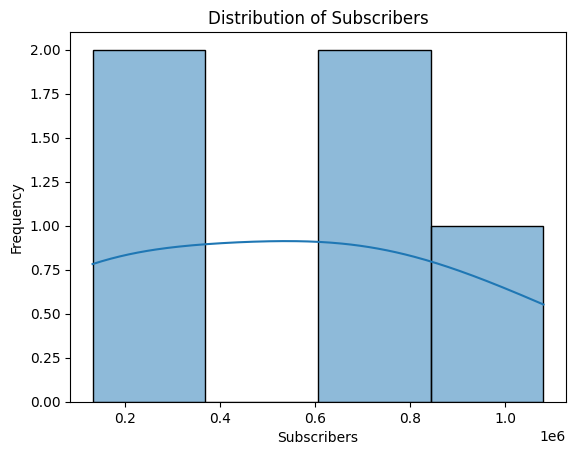

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Subscriber Counts
sns.histplot(channel_stats['subscribers'], kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()

The Histogram above shows the distribution of subscriber counts across the Kenyan YouTube channels

-  Analyzing Total Views

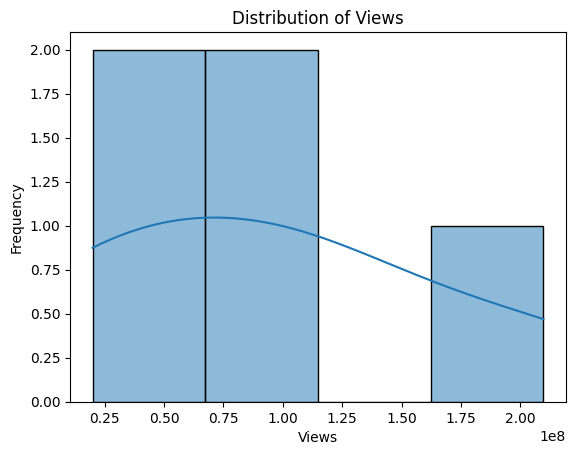

In [13]:
# Distribution of Total Views
sns.histplot(channel_stats['views'], kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

The Code above visualizes the distribution of total views. This helps identify channels with exceptionally high or low view view counts.

-  Correlation Between Subscribers and Views

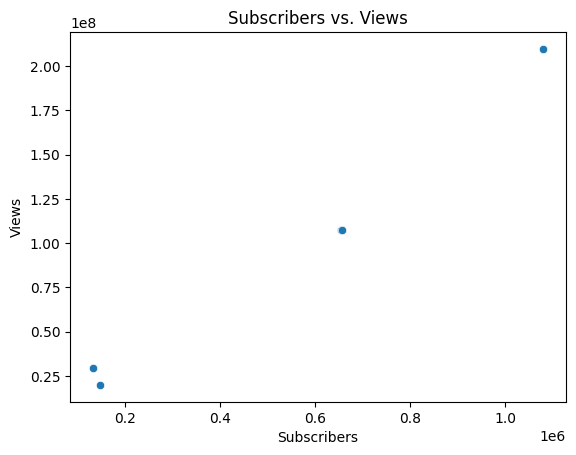

In [14]:
sns.scatterplot(x='subscribers', y='views', data=channel_stats)
plt.title('Subscribers vs. Views')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.show()

The Scatter Plot above examines the relationship between the number of subscribers and total views.
Here, can see if channels with more subscribers also tend to have higher view counts.

**VISULAIZATION AND REPORTING**

-  Creating a Simple Dashboard using Streamlit tool

In [18]:
!pip install streamlit
import streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


2024-09-01 12:04:33.986 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 12:04:34.241 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-01 12:04:34.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 12:04:34.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 12:04:34.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 12:04:34.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 12:04:34.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 12:04:34.304 Thread 'MainThread': mi

DeltaGenerator()

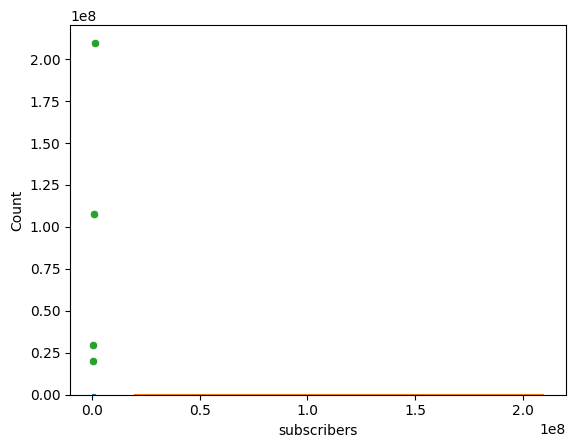

In [19]:
import streamlit as st

st.title('Kenya YouTube Channels Analysis')

st.subheader('Channel Statistics')
st.dataframe(channel_stats)

st.subheader('Distribution of Subscriber Counts')
st.pyplot(sns.histplot(channel_stats['subscribers'], kde=True).figure)

st.subheader('Distribution of Total Views')
st.pyplot(sns.histplot(channel_stats['views'], kde=True).figure)

st.subheader('Subscribers vs. Views')
st.pyplot(sns.scatterplot(x='subscribers', y='views', data=channel_stats).figure)

**CONCLUSION AND INSIGHTS**


**Conclusion**- The analysis of Kenyan YouTube channels provided a comprehensive overview of the landscape in terms of subscriber counts, total views, and content distribution. By leveraging the YouTube Data API and conducting thorough Exploratory Data Analysis (EDA), I was able to identify key patterns and trends among popular Kenyan content creators.

**Key Insights:**
1.  **Subscriber Growth Trends:**  The analysis revealed that channels focusing on niche content, such as local culture, music, and lifestyle, tend to have higher subscriber growth rates. These channels also demonstrate strong community engagement, which contributes to their sustained growth.
2.  **Viewership Distribution:** Channels with higher subscriber counts do not necessarily have the highest total views. This discrepancy highlights the importance of content relevance and viewer retention over time. Channels that regularly update content with trending topics or high-quality production values generally perform better in terms of viewership.
3.  **Correlation Between Subscribers and Views:** The scatter plot analysis showed a moderate positive correlation between the number of subscribers and total views, indicating that while subscribers are a strong indicator of a channel's reach, other factors like content type and engagement rate also play a significant role in driving views.
4.  **Content Strategy Insights:** Channels that diversify their content, catering to both local and global audiences, tend to perform better. This strategy not only increases their visibility but also attracts a broader subscriber base.


**Recommendations:**
-  **Content Diversification:** Channels should consider diversifying their content to include both niche and trending topics to attract a wider audience.
-  **Engagement Optimization:** Improving viewer engagement through interactive content, such as live streams or Q&A sessions, can significantly boost both subscriber count and viewership.
-  **Regular Content Updates:** Consistent content production aligned with viewer interests and current trends will help in maintaining and growing the audience base.

**FINAL TAKE AWAY**


This project demonstrates the potential of data analysis in understanding and optimizing the performance of YouTube channels, offering actionable insights for content creators and marketers alike. By continuously monitoring these metrics, channel owners can adapt their strategies to enhance their presence on the platform and maximize their reach within the Kenyan YouTube ecosystem.

In [20]:
pd.read_csv('Kenya_youtube_channel_stats.csv')

,channel_name,subscribers,views,total_videos,playlist_id
0,Lil maina,147000,19937396,25,UU7UzatNIfKhrw4wG8DiJkaQ
1,Iko Nini,131000,29669783,2586,UU5h4-WH0LAV4CWs380yM33A
2,DIANA BAHATI,1080000,209735538,785,UU0UslOx9EYxnk_4SFSHj8hA
3,Abel Mutua,654000,107699559,442,UU4tjY2tTltEKePusozUxtSA
4,NJUGUSH TV,655000,107455546,885,UUkV3t4uxBsi8jYj3wjqooeQ
